---
# Testing de la CNN - Micros
---

Kevin Alejandro Ramírez Luna | A01711063

## Paso 1. Ajustes y carga del modelo para pruebas

Montamos Google Drive

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Configuración del directorio con nuestro modelo

In [23]:
import sys

ruta_carpeta = '/content/drive/MyDrive/Inteligencia Artificial Avanzada /cnn benji'

if ruta_carpeta not in sys.path:
    sys.path.append(ruta_carpeta)

print(f"Se añadió la ruta: {ruta_carpeta} al sys.path")

Se añadió la ruta: /content/drive/MyDrive/Inteligencia Artificial Avanzada /cnn benji al sys.path


Copiamos y pegamos nuestra clase definida en la CNN para solo cargar nuestro modelo ya preentrenado

In [24]:
import torch
import torch.nn as nn # Añadir esta línea

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()

        # Convolutional layers for feature extraction
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), # Input: 3 channels (RGB), Output: 32 channels
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), # Reduces 224x224 to 112x112

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), # Reduces 112x112 to 56x56

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), # Reduces 56x56 to 28x28

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Reduces 28x28 to 14x14
        )

        # Fully connected layers for classification
        # Calculate the size of the flattened features
        # Input image size is IMG_SIZE x IMG_SIZE = 224x224
        # After 4 MaxPool2d layers with kernel_size=2, stride=2:
        # 224 / 2 / 2 / 2 / 2 = 14
        # So, the output size before flattening is 256 channels * 14 * 14
        self.classifier = nn.Sequential(
            nn.Linear(256 * 14 * 14, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5), # Dropout for regularization
            nn.Linear(512, num_classes) # Final layer outputs to the number of classes
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1) # Flatten the output for the fully connected layers
        x = self.classifier(x)
        return x

# Instantiate the model
# num_classes = len(class_mapping) # class_mapping is not defined here
# model = SimpleCNN(num_classes=num_classes).to(device) # device is not defined here

# Placeholder for num_classes and device until defined elsewhere
# For demonstration, let's assume num_classes = 10 and device = 'cpu'
# You will need to define these based on your actual setup.
num_classes = 13 # Define a placeholder or get from your dataset/config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Define device

model = SimpleCNN(num_classes=num_classes).to(device) # Descomentar esta línea para inicializar el modelo

print(f"CNN Model initialized with {num_classes} output classes.")
print(model)


CNN Model initialized with 13 output classes.
SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13)

Ruta al archivo `pth` para cargar el modelo

In [44]:
# Ruta al archivo .pth
model_path = "/content/drive/MyDrive/archive/best_model.pth"
model = SimpleCNN(num_classes=num_classes).to(device)

# Cargar los pesos entrenados
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()  # Modo evaluación

SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, af

## Paso 2. Predicciones y graficación

Estandarización de las imagenes de entrada (para que sean compatibles con al CNN)

In [45]:
from torchvision import transforms
from PIL import Image

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

def predict_image(image_path, model, transform, class_mapping):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
        predicted_class = class_mapping[predicted.item()]
        probabilities = torch.softmax(outputs, dim=1)

    return predicted_class, probabilities.cpu().numpy()[0]

Grafica  para visualizar las imagenes que generamos

In [46]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np

def visualize_prediction(image_path, predicted_class_name, probabilities, class_mapping):
    """
    Visualiza la imagen de entrada con un bounding box que muestra la clase predicha
    y un gráfico de barras con las probabilidades.
    """
    # Abre la imagen usando PIL
    original_pil_image = Image.open(image_path).convert('RGB')

    # Crea una copia para dibujar el bounding box y el texto
    display_image_for_plot = original_pil_image.copy()

    # --- Visualización ---
    plt.figure(figsize=(14, 7)) # Ajusta el tamaño de la figura para dos subplots

    # Subplot 1: Imagen original con Bounding Box y Etiqueta
    plt.subplot(1, 2, 1)

    # Prepara para dibujar en la copia de la imagen PIL
    draw = ImageDraw.Draw(display_image_for_plot)

    # Intenta cargar una fuente, si no, usa la predeterminada
    try:
        font = ImageFont.truetype("arial.ttf", 24)
    except IOError:
        font = ImageFont.load_default()

    # Define las coordenadas del bounding box (alrededor de toda la imagen)
    img_width, img_height = display_image_for_plot.size
    box_padding = 5 # Margen desde los bordes de la imagen
    box_coords = (box_padding, box_padding, img_width - box_padding, img_height - box_padding)

    # Dibuja el bounding box (rojo, 3 píxeles de grosor)
    draw.rectangle(box_coords, outline="red", width=3)

    # Texto para la clase predicha y la confianza
    confidence = probabilities[np.where([class_mapping[k] == predicted_class_name for k in class_mapping])[0][0]].item()
    text_label = f"{predicted_class_name} ({confidence:.2%})"
    text_color = "red"

    # Posiciona el texto dentro del bounding box (esquina superior izquierda)
    text_x = box_padding + 10
    text_y = box_padding + 10

    # Dibuja el texto con un contorno negro para mejor visibilidad
    outline_color = "black"
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            draw.text((text_x + dx, text_y + dy), text_label, font=font, fill=outline_color)
    draw.text((text_x, text_y), text_label, font=font, fill=text_color)


    plt.imshow(display_image_for_plot)
    plt.title(f"Predicción: {predicted_class_name}")
    plt.axis('off')

    # Subplot 2: Gráfico de barras de Probabilidades
    plt.subplot(1, 2, 2)

    # Obtiene todas las clases para el gráfico de barras (asumiendo 13 clases)
    N_classes = len(class_mapping)
    # Ordena las probabilidades para obtener las N principales
    sorted_indices = np.argsort(probabilities)[::-1]

    # Obtiene los nombres de las clases y las probabilidades para estos índices
    display_class_names = [class_mapping[i] for i in sorted_indices]
    display_probs = probabilities[sorted_indices]

    y_pos = np.arange(len(display_class_names))
    plt.barh(y_pos, display_probs, align='center', color='skyblue')
    plt.yticks(y_pos, display_class_names)
    plt.xlabel('Probabilidad')
    plt.title('Probabilidades de Clase')
    plt.gca().invert_yaxis() # Muestra la probabilidad más alta arriba
    plt.tight_layout()
    plt.show()

    print(f"Predicted class: {predicted_class_name}")
    print(f"Confidence: {confidence:.2%}")

In [47]:
# Modifica la función predict_image para que solo devuelva los resultados
from torchvision import transforms
from PIL import Image
import torch

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

def predict_image(image_path, model, transform, class_mapping):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
        predicted_class = class_mapping[predicted.item()]
        probabilities = torch.softmax(outputs, dim=1)

    return predicted_class, probabilities.cpu().numpy()[0]

Prueba

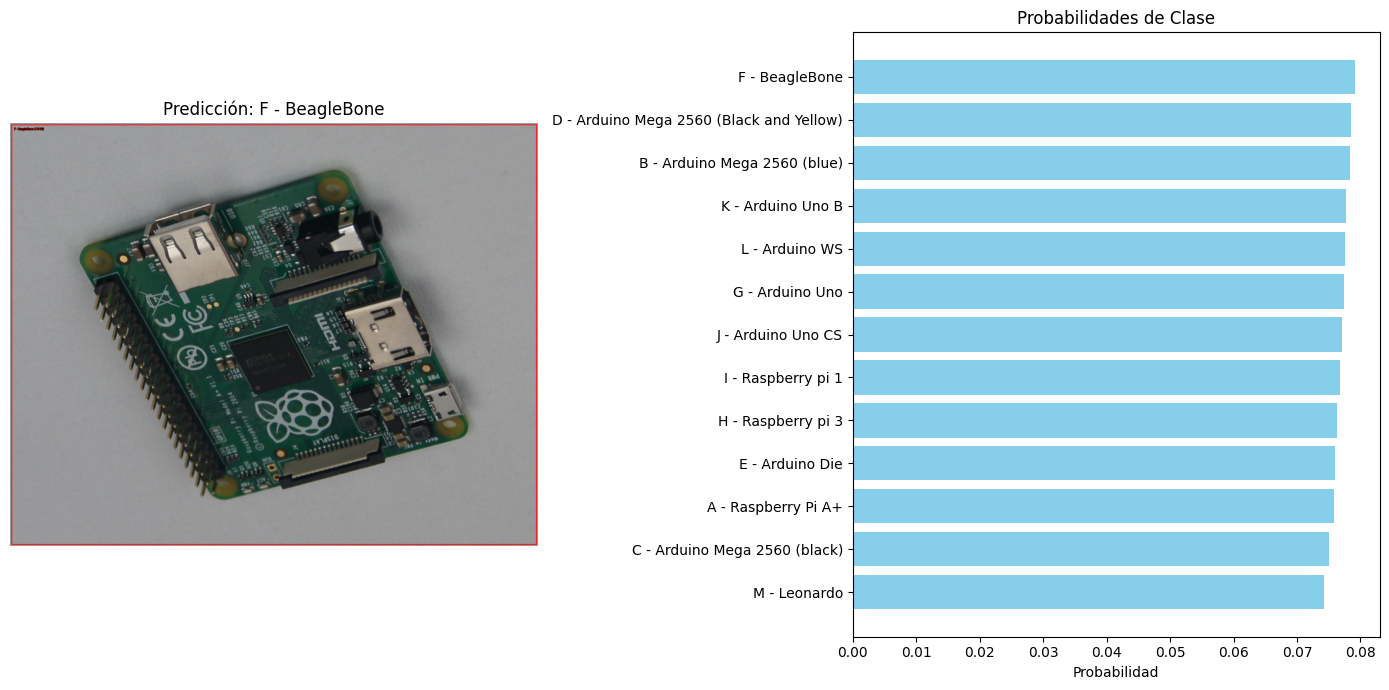

Predicted class: F - BeagleBone
Confidence: 7.91%


In [48]:
image_path = "/content/drive/MyDrive/archive/imagenes_procesadas/test/ModelM/MABA5.jpg" # Cargamos una imagen del set de test para ver si es que se dio un buen resultado

# Debes definir tu class_mapping aquí. Por ejemplo, si tienes 13 clases:
class_mapping = {
    0: 'A - Raspberry Pi A+', 1: 'B - Arduino Mega 2560 (blue)', 2: 'C - Arduino Mega 2560 (black)', 3: 'D - Arduino Mega 2560 (Black and Yellow)', 4: 'E - Arduino Die',
    5: 'F - BeagleBone', 6: 'G - Arduino Uno', 7: 'H - Raspberry pi 3', 8: 'I - Raspberry pi 1', 9: 'J - Arduino Uno CS',
    10: 'K - Arduino Uno B', 11: 'L - Arduino WS', 12: 'M - Leonardo'
} # Asegúrate de que este mapeo coincida con las 13 clases de tu modelo

# Primero, obtén la predicción
predicted_class, probabilities = predict_image(
    image_path, model, test_transform, class_mapping
)

# Luego, visualiza los resultados
visualize_prediction(image_path, predicted_class, probabilities, class_mapping)